In [97]:
%matplotlib inline
%load_ext autoreload
#%load_ext line_profiler
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import utils
import vis_utils

(480, 640)


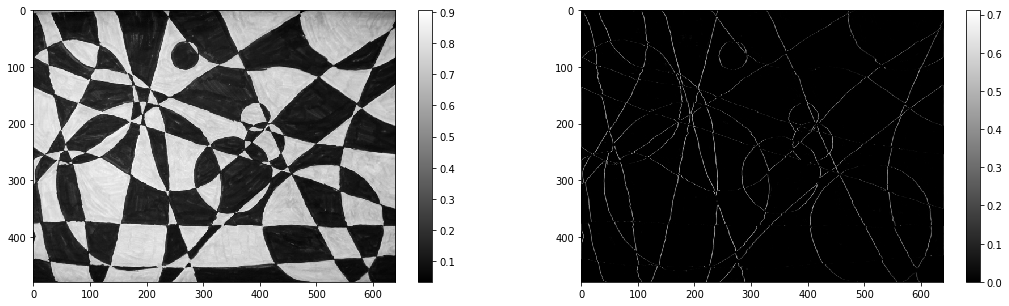

In [99]:
##### Visualization for convlution : image derivative
from student import convolution
from student import *
img = utils.grayscale(utils.read_image('test.jpg'))
print(img.shape)
kernel = np.array([[-1, 0, 1.]])
ret = convolution(img, kernel, padding='fill')**2

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(ret, cmap='gray')
plt.colorbar()
plt.show()


In [100]:
import scipy as sp
import scipy.ndimage
laplacian_kernel_2d = np.array([[ 0,-1, 0],
                                [-1, 4,-1],
                                [ 0,-1, 0]])
laplacian_kernel2 = -1*np.array([[.25, .5,.25],
                                 [.5,-3,.5],
                                [.25, .5,.25]])
%timeit convolution(img, laplacian_kernel_2d, padding='fill')
%timeit sp.ndimage.filters.convolve(img, laplacian_kernel_2d, mode='constant')

2.1 ms ± 3.07 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.91 ms ± 1.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


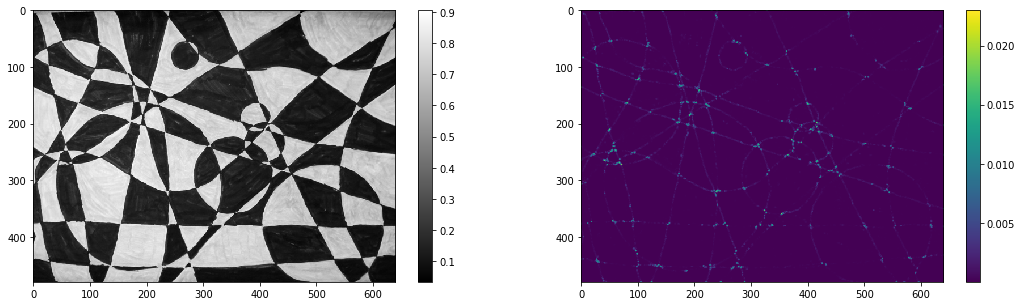

In [101]:
##### Visualization for Harris corner response
from student import compute_Harris_response
img = utils.grayscale(utils.read_image('test.jpg'))
out = compute_Harris_response(img,3,sigma=.1)
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(out)
plt.colorbar()
plt.show()

Threshold:0.010000000000000002 max_response:0.023005235409727504 min_response:0.0


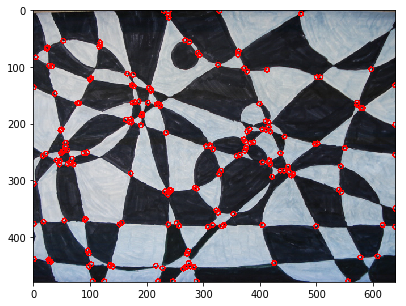

Detect:186 corners


In [102]:
from student import compute_Harris_corners

rgb_img = utils.read_image('test.jpg')
img = utils.grayscale(rgb_img)
thresh = 0.1**2
corners, response = compute_Harris_corners(img,3,thresh,sigma=.1)
print("Threshold:%s max_response:%s min_response:%s"%(thresh, response.max(), response.min()))

plt.figure(figsize=(18,5))
plt.imshow(vis_utils.plot_corners(corners, rgb_img))
plt.show()
print("Detect:%d corners"%len(corners))


Threshold:0.005 max_response:0.022528658939915194 min_response:0.0
Threshold:0.005 max_response:0.0190146789758871 min_response:0.0


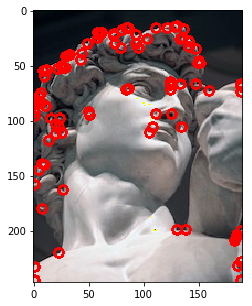

Detect:93 corners


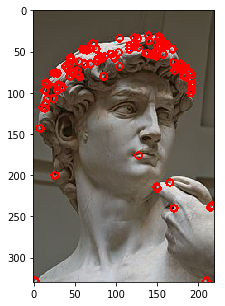

Detect:102 corners


In [103]:
# Visualization for SIFT
from student import compute_mini_sift_desc
from student import compute_Harris_corners

# rgb_img_1 = utils.read_image('temple0001.png')
# rgb_img_2 = utils.read_image('temple0004.png')
# thresh = 0.05

rgb_img_1 = utils.read_image('michelangelo1.jpg')
rgb_img_2 = utils.read_image('michelangelo2.jpg')
thresh = 0.005

# rgb_img_1 = utils.read_image('im0_out.png')
# rgb_img_2 = utils.read_image('im1_out.png')
# thresh = 0.005

img_1 = utils.grayscale(rgb_img_1)
img_2 = utils.grayscale(rgb_img_2)
corners_1, response_1 = compute_Harris_corners(img_1,3,thresh)
print("Threshold:%s max_response:%s min_response:%s"%(thresh, response_1.max(), response_1.min()))
#siftdesc_1 = compute_mini_sift_desc(img_1, corners_1)

corners_2, response_2 = compute_Harris_corners(img_2,3,thresh)
print("Threshold:%s max_response:%s min_response:%s"%(thresh, response_2.max(), response_2.min()))
#siftdesc_2 = compute_mini_sift_desc(img_2, corners_2)

for corners, rgb_img in [(corners_1, rgb_img_1), (corners_2, rgb_img_2)]:
    plt.figure(figsize=(18,5))
    plt.imshow(vis_utils.plot_corners(corners, rgb_img))
    plt.show()
    print("Detect:%d corners"%len(corners))

In [84]:
from student import find_correspondences, estimate_F

# corr, minidx, match_scores = find_correspondences(
#     corners_1, corners_2, siftdesc_1, siftdesc_2, match_score_type='ratio'
# )
corr, minidx, match_scores = find_correspondences(
    corners_1, corners_2, siftdesc_1, siftdesc_2, match_score_type='ssd'
)

print(match_scores.max())
mask= match_scores > 0.

out_img = vis_utils.plot_corr(corr, rgb_img_1, rgb_img_2, mask=mask)
print(out_img.shape)
plt.figure(figsize=(25,10))
plt.imshow(out_img)
plt.show()

outs = vis_utils.draw_epipolar_lines(img_1, img_2, corr, estimate_F(corr))
plt.figure(figsize=(20,15))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(outs[i])
plt.show()

NameError: name 'siftdesc_1' is not defined

(247, 720, 3)


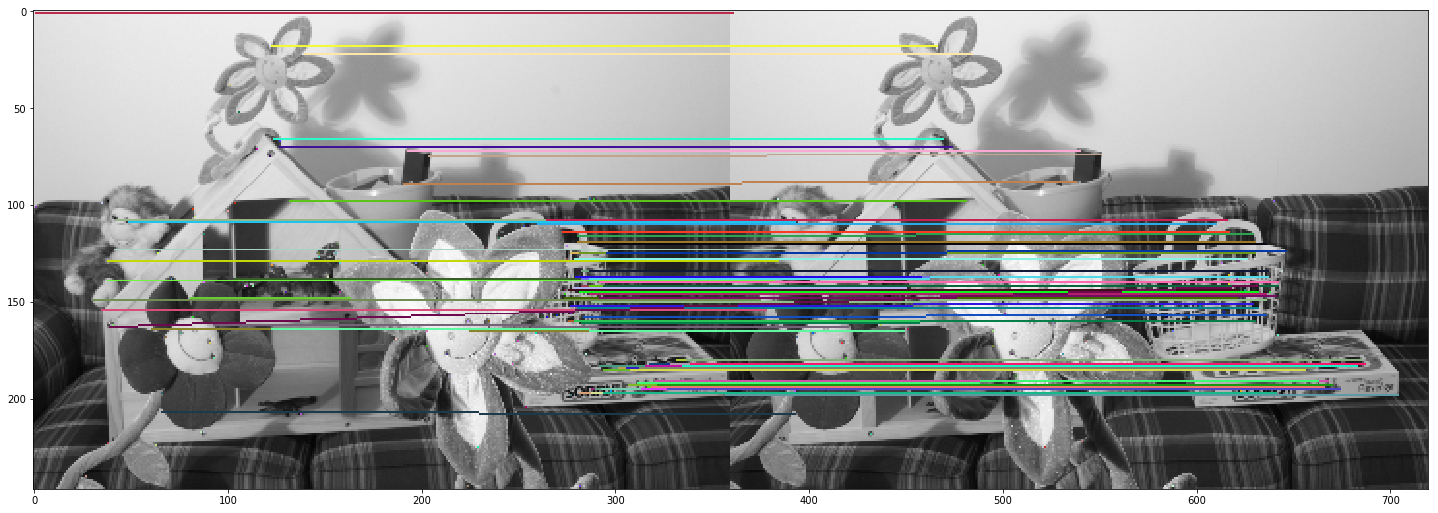

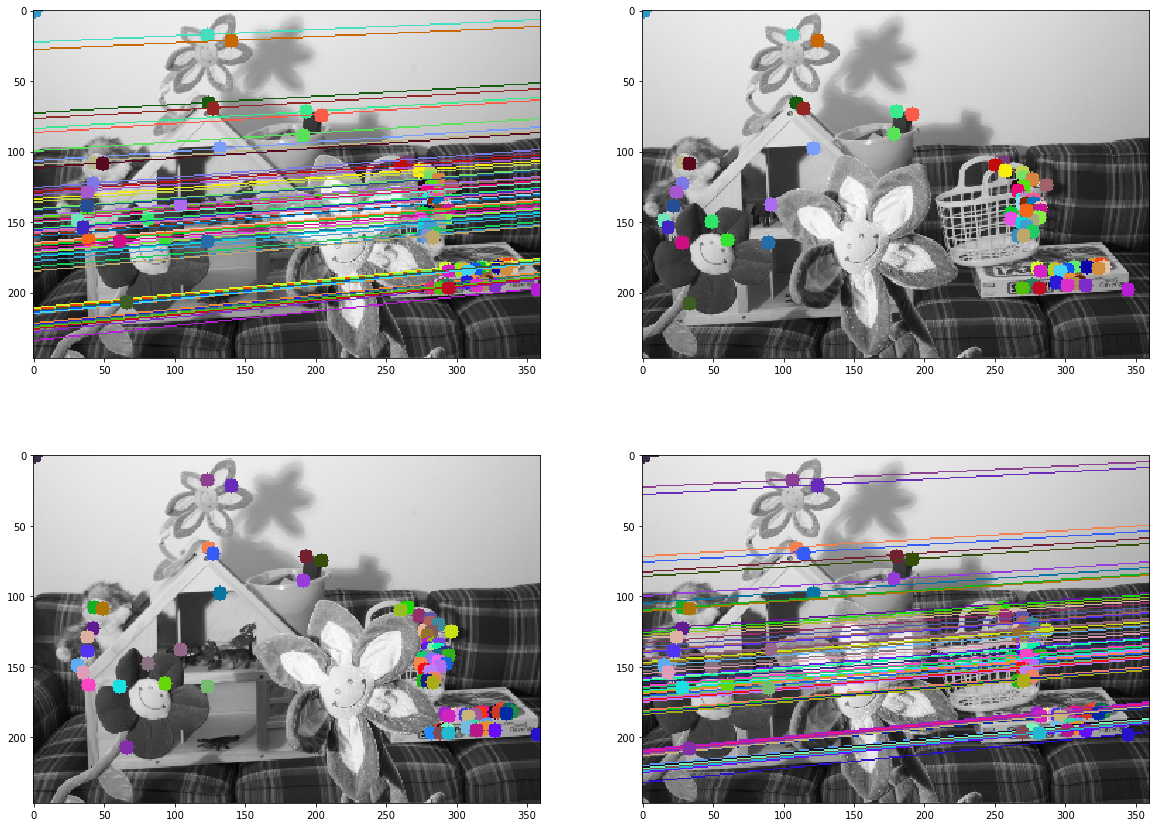

In [16]:
# Use RANSAC to filter out correspondences
from student import find_correspondences, estimate_F, ransac, sym_epipolar_dist
F, inlier_mask = ransac(corr, estimate_F, sym_epipolar_dist, 8, 1000, 2)
good_corr = corr[inlier_mask]
out_img = vis_utils.plot_corr(corr, rgb_img_1, rgb_img_2, mask=inlier_mask)
print(out_img.shape)
plt.figure(figsize=(25,10))
plt.imshow(out_img)
plt.show()

outs = vis_utils.draw_epipolar_lines(img_1, img_2, good_corr, F)
plt.figure(figsize=(20,15))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(outs[i])
plt.show()